In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [3]:
dataset = pd.read_csv("storage_dataset/prototype_final_dataset.csv")
dataset

,Date,Time,SM_2,SM_4,SM_8,SM_20,SM_40,ST_2,ST_4,ST_8,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,01-01-2022,00:00,38.2,35.9,31.0,36.9,34.0,15.9,15.5,15.5,...,1009.4,100.0,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"KHSV,72323003856,72030763804,KMDQ,AAMA1"
1,01-01-2022,01:00,38.2,36.0,30.9,36.7,34.1,16.0,15.6,15.6,...,1009.3,91.7,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"KHSV,72323003856,72030763804,KMDQ,AAMA1"
2,01-01-2022,02:00,38.3,36.0,31.0,36.7,33.9,16.0,15.6,15.6,...,1009.3,62.7,16.0,0.0,0.0,0.0,NaN,Partially cloudy,partly-cloudy-night,"KHSV,72323003856,72030763804,KMDQ,AAMA1"
3,01-01-2022,03:00,38.3,35.8,30.9,36.7,33.9,16.1,15.7,15.6,...,1009.3,91.7,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"KHSV,72323003856,72030763804,KMDQ,AAMA1"
4,01-01-2022,04:00,38.3,35.9,30.9,36.7,33.9,16.2,15.7,15.7,...,1009.6,100.0,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"KHSV,72323003856,72030763804,KMDQ"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,31-12-2022,20:00,36.7,36.2,30.5,34.7,31.8,10.2,10.0,9.9,...,1015.1,36.2,16.0,0.0,0.0,0.0,10.0,Partially cloudy,partly-cloudy-night,"KHSV,72323003856,72030763804,KMDQ"
8757,31-12-2022,21:00,36.5,36.1,30.3,34.9,31.8,9.9,9.9,9.8,...,1015.6,20.4,16.0,0.0,0.0,0.0,10.0,Partially cloudy,partly-cloudy-night,"KHSV,72323003856,72030763804,KMDQ"
8758,31-12-2022,22:00,36.5,36.1,30.3,34.8,32.0,9.7,9.7,9.8,...,1016.1,37.3,12.7,0.0,0.0,0.0,10.0,Partially cloudy,partly-cloudy-night,"KHSV,72323003856,72030763804,KMDQ"
8759,31-12-2022,23:00,37.2,36.0,30.3,34.8,32.0,9.4,9.6,9.7,...,1015.9,79.0,14.0,0.0,0.0,0.0,10.0,Partially cloudy,partly-cloudy-night,"KHSV,72323003856,72030763804,KMDQ"


In [4]:
dataset.columns

Index(['Date', 'Time', 'SM_2', 'SM_4', 'SM_8', 'SM_20', 'SM_40', 'ST_2',
       'ST_4', 'ST_8', 'ST_20', 'ST_40', 'temp', 'feelslike', 'dew',
       'humidity', 'precip', 'precipprob', 'preciptype', 'snow', 'snowdepth',
       'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk',
       'conditions', 'icon', 'stations'],
      dtype='object')

In [5]:
dataset.__len__()

8761

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8761 entries, 0 to 8760
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              8760 non-null   object 
 1   Time              8760 non-null   object 
 2   SM_2              8760 non-null   float64
 3   SM_4              8760 non-null   float64
 4   SM_8              8760 non-null   float64
 5   SM_20             8760 non-null   float64
 6   SM_40             8760 non-null   float64
 7   ST_2              8760 non-null   float64
 8   ST_4              8760 non-null   float64
 9   ST_8              8760 non-null   float64
 10  ST_20             8760 non-null   float64
 11  ST_40             8760 non-null   float64
 12  temp              8760 non-null   float64
 13  feelslike         8760 non-null   float64
 14  dew               8760 non-null   float64
 15  humidity          8760 non-null   float64
 16  precip            8760 non-null   float64


In [7]:
dataset.__len__()

8761

In [8]:
dataset

,Date,Time,SM_2,SM_4,SM_8,SM_20,SM_40,ST_2,ST_4,ST_8,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,01-01-2022,00:00,38.2,35.9,31.0,36.9,34.0,15.9,15.5,15.5,...,1009.4,100.0,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"KHSV,72323003856,72030763804,KMDQ,AAMA1"
1,01-01-2022,01:00,38.2,36.0,30.9,36.7,34.1,16.0,15.6,15.6,...,1009.3,91.7,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"KHSV,72323003856,72030763804,KMDQ,AAMA1"
2,01-01-2022,02:00,38.3,36.0,31.0,36.7,33.9,16.0,15.6,15.6,...,1009.3,62.7,16.0,0.0,0.0,0.0,NaN,Partially cloudy,partly-cloudy-night,"KHSV,72323003856,72030763804,KMDQ,AAMA1"
3,01-01-2022,03:00,38.3,35.8,30.9,36.7,33.9,16.1,15.7,15.6,...,1009.3,91.7,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"KHSV,72323003856,72030763804,KMDQ,AAMA1"
4,01-01-2022,04:00,38.3,35.9,30.9,36.7,33.9,16.2,15.7,15.7,...,1009.6,100.0,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"KHSV,72323003856,72030763804,KMDQ"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,31-12-2022,20:00,36.7,36.2,30.5,34.7,31.8,10.2,10.0,9.9,...,1015.1,36.2,16.0,0.0,0.0,0.0,10.0,Partially cloudy,partly-cloudy-night,"KHSV,72323003856,72030763804,KMDQ"
8757,31-12-2022,21:00,36.5,36.1,30.3,34.9,31.8,9.9,9.9,9.8,...,1015.6,20.4,16.0,0.0,0.0,0.0,10.0,Partially cloudy,partly-cloudy-night,"KHSV,72323003856,72030763804,KMDQ"
8758,31-12-2022,22:00,36.5,36.1,30.3,34.8,32.0,9.7,9.7,9.8,...,1016.1,37.3,12.7,0.0,0.0,0.0,10.0,Partially cloudy,partly-cloudy-night,"KHSV,72323003856,72030763804,KMDQ"
8759,31-12-2022,23:00,37.2,36.0,30.3,34.8,32.0,9.4,9.6,9.7,...,1015.9,79.0,14.0,0.0,0.0,0.0,10.0,Partially cloudy,partly-cloudy-night,"KHSV,72323003856,72030763804,KMDQ"


In [9]:
dataset.drop(
    [
        "Date",
        "SM_2",
        "SM_8",
        "SM_20",
        "SM_40",
        "ST_2",
        "ST_8",
        "ST_20",
        "ST_40",
        "solarenergy",
        "precipprob",
        "preciptype",
        "snow",
        "snowdepth",
        "windgust",
        "winddir",
        "sealevelpressure",
        "visibility",
        "solarenergy",
        "uvindex",
        "severerisk",
        "icon",
        "stations",
        "dew",
        "solarradiation",
        "Time",
        # "cloudcover",
        "feelslike",
        # "windspeed",
    ],
    inplace=True,
    axis=1,
)

In [10]:
dataset

,SM_4,ST_4,temp,humidity,precip,windspeed,cloudcover,conditions
0,35.9,15.5,21.6,84.50,0.0,22.3,100.0,Overcast
1,36.0,15.6,21.6,84.97,0.0,27.7,91.7,Overcast
2,36.0,15.6,21.2,86.87,0.0,22.8,62.7,Partially cloudy
3,35.8,15.7,21.2,86.66,0.0,22.8,91.7,Overcast
4,35.9,15.7,21.6,84.50,0.0,19.8,100.0,Overcast
...,...,...,...,...,...,...,...,...
8756,36.2,10.0,12.5,90.76,0.0,4.0,36.2,Partially cloudy
8757,36.1,9.9,11.4,93.88,0.0,5.6,20.4,Partially cloudy
8758,36.1,9.7,10.7,96.47,0.0,0.0,37.3,Partially cloudy
8759,36.0,9.6,10.1,99.41,0.0,7.0,79.0,Partially cloudy


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8761 entries, 0 to 8760
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SM_4        8760 non-null   float64
 1   ST_4        8760 non-null   float64
 2   temp        8760 non-null   float64
 3   humidity    8760 non-null   float64
 4   precip      8760 non-null   float64
 5   windspeed   8760 non-null   float64
 6   cloudcover  8760 non-null   float64
 7   conditions  8760 non-null   object 
dtypes: float64(7), object(1)
memory usage: 547.7+ KB


In [12]:
dataset = dataset.dropna()

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8759 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SM_4        8759 non-null   float64
 1   ST_4        8759 non-null   float64
 2   temp        8759 non-null   float64
 3   humidity    8759 non-null   float64
 4   precip      8759 non-null   float64
 5   windspeed   8759 non-null   float64
 6   cloudcover  8759 non-null   float64
 7   conditions  8759 non-null   object 
dtypes: float64(7), object(1)
memory usage: 615.9+ KB


In [14]:
dataset.columns

Index(['SM_4', 'ST_4', 'temp', 'humidity', 'precip', 'windspeed', 'cloudcover',
       'conditions'],
      dtype='object')

In [15]:
Categorical_unique_conditions = dataset.conditions.unique()
print(Categorical_unique_conditions)
print(len(Categorical_unique_conditions))

['Overcast' 'Partially cloudy' 'Rain, Partially cloudy' 'Rain, Overcast'
 'Snow, Rain, Overcast' 'Snow, Rain, Partially cloudy' 'Clear'
 'Snow, Overcast' 'Rain']
9


In [16]:
dataset

,SM_4,ST_4,temp,humidity,precip,windspeed,cloudcover,conditions
0,35.9,15.5,21.6,84.50,0.0,22.3,100.0,Overcast
1,36.0,15.6,21.6,84.97,0.0,27.7,91.7,Overcast
2,36.0,15.6,21.2,86.87,0.0,22.8,62.7,Partially cloudy
3,35.8,15.7,21.2,86.66,0.0,22.8,91.7,Overcast
4,35.9,15.7,21.6,84.50,0.0,19.8,100.0,Overcast
...,...,...,...,...,...,...,...,...
8755,36.5,10.1,14.7,77.19,0.0,0.0,37.3,Partially cloudy
8756,36.2,10.0,12.5,90.76,0.0,4.0,36.2,Partially cloudy
8757,36.1,9.9,11.4,93.88,0.0,5.6,20.4,Partially cloudy
8758,36.1,9.7,10.7,96.47,0.0,0.0,37.3,Partially cloudy


In [17]:
X = dataset.iloc[:, 1:].values
X

array([[15.5, 21.6, 84.5, ..., 22.3, 100.0, 'Overcast'],
       [15.6, 21.6, 84.97, ..., 27.7, 91.7, 'Overcast'],
       [15.6, 21.2, 86.87, ..., 22.8, 62.7, 'Partially cloudy'],
       ...,
       [9.9, 11.4, 93.88, ..., 5.6, 20.4, 'Partially cloudy'],
       [9.7, 10.7, 96.47, ..., 0.0, 37.3, 'Partially cloudy'],
       [9.6, 10.1, 99.41, ..., 7.0, 79.0, 'Partially cloudy']],
      dtype=object)

In [18]:
y = dataset.iloc[:, 0].values
y

array([35.9, 36. , 36. , ..., 36.1, 36.1, 36. ])

In [19]:
""" taking care of categorical data in conditions column """
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    transformers=[("encoder", OneHotEncoder(), [-1])], remainder="passthrough"
)
X = np.array(ct.fit_transform(X))
X

array([[0.0, 1.0, 0.0, ..., 0.0, 22.3, 100.0],
       [0.0, 1.0, 0.0, ..., 0.0, 27.7, 91.7],
       [0.0, 0.0, 1.0, ..., 0.0, 22.8, 62.7],
       ...,
       [0.0, 0.0, 1.0, ..., 0.0, 5.6, 20.4],
       [0.0, 0.0, 1.0, ..., 0.0, 0.0, 37.3],
       [0.0, 0.0, 1.0, ..., 0.0, 7.0, 79.0]], dtype=object)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=0
)

In [21]:
print("X_train shape = ", X_train.shape)
print("y_train shape = ", y_train.shape)

X_train shape =  (7445, 15)
y_train shape =  (7445,)


In [22]:
print("X_test shape = ", X_test.shape)
print("y_test shape = ", y_test.shape)

X_test shape =  (1314, 15)
y_test shape =  (1314,)


In [23]:
X_train[0]

array([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 27.5, 33.8, 57.1, 0.0,
       8.3, 85.2], dtype=object)

In [24]:
y_train[0]

20.9

In [25]:
""" Scaling data """
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train[:, 9:] = sc.fit_transform(X_train[:, 9:])
X_test[:, 9:] = sc.transform(X_test[:, 9:])
X_train[0]

array([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9045936395759717,
       0.9559386973180075, 0.4968922246980181, 0.0, 0.1930232558139535,
       0.8520000000000001], dtype=object)

In [26]:
X_train[0]

array([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9045936395759717,
       0.9559386973180075, 0.4968922246980181, 0.0, 0.1930232558139535,
       0.8520000000000001], dtype=object)

In [27]:
X_train[0].shape

(15,)

In [28]:
X_train = np.asarray(X_train).astype("float32")
y_train = np.asarray(y_train).astype("float32")

<h1>ANN model </h1>


In [29]:
X_test = np.asarray(X_test).astype("float32")
y_test = np.asarray(y_test).astype("float32")


Epoch 1/100




233/233 [==============================] - 2s 3ms/step - loss: 600.3043 - mean_absolute_error: 21.7675 - val_loss: 50.0633 - val_mean_absolute_error: 6.1209
Epoch 2/100
233/233 [==============================] - 0s 2ms/step - loss: 39.9759 - mean_absolute_error: 5.4635 - val_loss: 33.3364 - val_mean_absolute_error: 4.9705
Epoch 3/100
233/233 [==============================] - 0s 2ms/step - loss: 26.9449 - mean_absolute_error: 4.4171 - val_loss: 22.5920 - val_mean_absolute_error: 3.9817
Epoch 4/100
233/233 [==============================] - 0s 2ms/step - loss: 18.9154 - mean_absolute_error: 3.6152 - val_loss: 17.5307 - val_mean_absolute_error: 3.3833
Epoch 5/100
233/233 [==============================] - 0s 2ms/step - loss: 15.8205 - mean_absolute_error: 3.2461 - val_loss: 15.7239 - val_mean_absolute_error: 3.1966
Epoch 6/100
233/233 [==============================] - 0s 2ms/step - loss: 14.8263 - mean_absolute_error: 3.1339 - val_loss: 15.1270 - val_mean_absolute_error: 3.1370
Epoch 

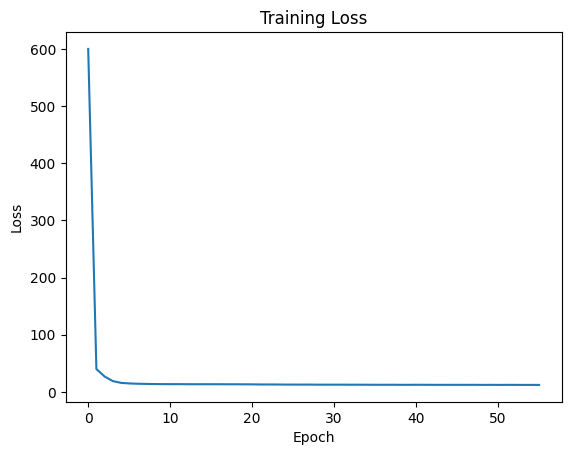

In [30]:
""" Model """
ANN_model = keras.Sequential(
    [
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dense(8, activation="relu"),
        keras.layers.Dense(4, activation="relu"),
        keras.layers.Dense(2, activation="relu"),
        keras.layers.Dense(1),
    ]
)

ANN_model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.mean_squared_error,
    metrics=keras.metrics.mean_absolute_error,
)
early_stopping = EarlyStopping(patience=5)
history = ANN_model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
)

ANN_model.summary()

plt.plot(history.history["loss"])
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


ann_ypred = ANN_model.predict(X_test)


annMAE = mean_absolute_error(y_test, ann_ypred)


annMSE = mean_squared_error(y_test, ann_ypred)


print("mean absolute error = ", annMAE)


print("mean Squared error = ", annMSE)

42/42 [==============================] - 0s 1ms/step
mean absolute error =  2.8141499
mean Squared error =  12.678282


Text(0.5, 1.0, 'ANN_model')

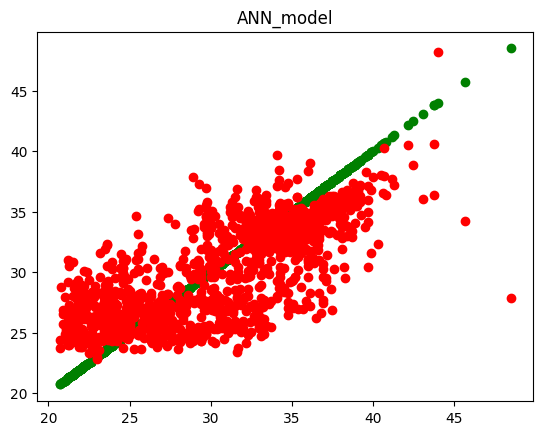

In [32]:
plt.scatter(y_test, y_test, color="green")
plt.scatter(y_test, ann_ypred, color="red")
plt.title("ANN_model")

<H1>MULTIPLE LINEAR REGRESSION </H1>


In [33]:
from sklearn.linear_model import LinearRegression

MLR_model = LinearRegression()
MLR_model.fit(X_train, y_train)

LinearRegression()

In [34]:
mlr_ypred = MLR_model.predict(X_test)

In [35]:
mlr_MAE = mean_absolute_error(y_test, mlr_ypred)
mlr_MSE = mean_squared_error(y_test, mlr_ypred)
print(mlr_MAE)
print(mlr_MSE)

3.0007312
13.922258


Text(0.5, 1.0, 'MLR_model')

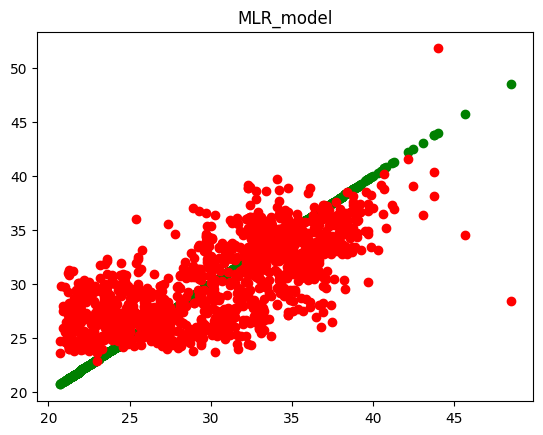

In [36]:
plt.scatter(y_test, y_test, color="green")
plt.scatter(y_test, mlr_ypred, color="red")
plt.title("MLR_model")

<h1>DECISION TREE REGRESSION </H1>


In [37]:
from sklearn.tree import DecisionTreeRegressor

# Increase maximum depth
DTR_model = DecisionTreeRegressor(max_depth=13, random_state=0, min_samples_split=20)

# Fine-tune hyperparameters
DTR_model.fit(X_train, y_train)

dtr_ypred = DTR_model.predict(X_test).reshape(-1, 1)

dtr_mae = mean_absolute_error(y_test, dtr_ypred)
dtr_mse = mean_squared_error(y_test, dtr_ypred)
print("DTR MAE:", dtr_mae)
print("DTR MSE:", dtr_mse)

DTR MAE: 2.331529393480891
DTR MSE: 11.3697717310569


Text(0.5, 1.0, 'DecisionTreeRegressor(max_depth=13, min_samples_split=20, random_state=0)')

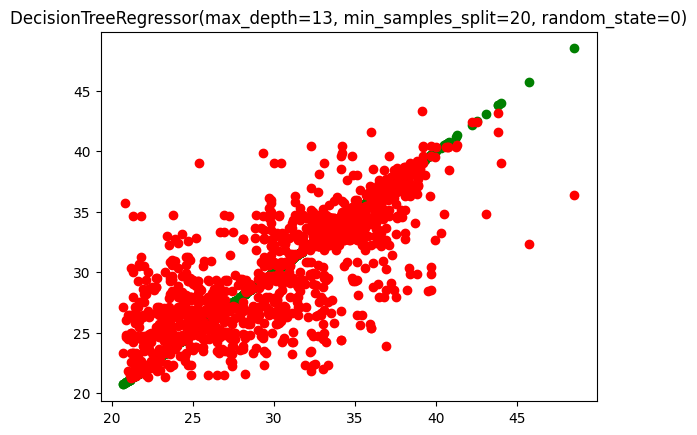

In [38]:
plt.scatter(y_test, y_test, color="green")
plt.scatter(y_test, dtr_ypred, color="red")
plt.title(DTR_model)

<h1>SVR</h1>

In [39]:
from sklearn.svm import SVR

SVR = SVR(kernel="rbf", C=10, gamma=0.1)

SVR.fit(X_train, y_train)

SVR(C=10, gamma=0.1)

In [40]:
svr_ypred = SVR.predict(X_test)

In [41]:
print("mean_absolute_error = ", mean_absolute_error(y_test, svr_ypred))
print("mean_squared_error = ", mean_squared_error(y_test, svr_ypred))

mean_absolute_error =  2.8308978642466123
mean_squared_error =  13.642122818894368


Text(0.5, 1.0, 'SVR(C=10, gamma=0.1)')

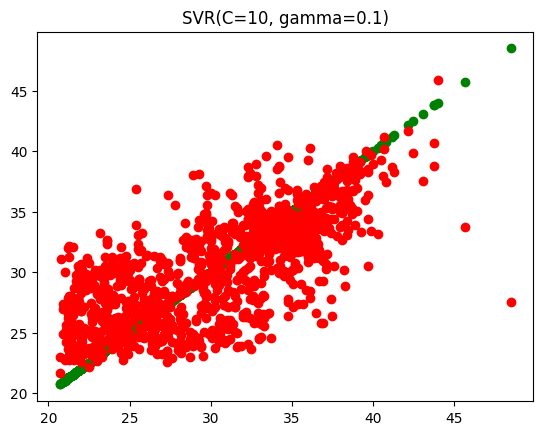

In [42]:
plt.scatter(y_test, y_test, color="green")
plt.scatter(y_test, svr_ypred, color="red")
plt.title(SVR)

<h1>MODEL COMPARISON </H1>

In [43]:
def least_error(row):
    y_true = row[0]
    cols = ["ytest", "DTR", "MLR", "ANN", "SVR"]
    lowest = 1000
    least_err = "DTR"
    for i in range(1, len(cols)):
        diff = abs(y_true - row[i])
        if diff < lowest:
            lowest, least_err = diff, cols[i]
    return least_err

In [44]:
reshape = (-1, 1)
comp = np.concatenate(
    (
        y_test.reshape(reshape),
        dtr_ypred.reshape(reshape),
        mlr_ypred.reshape(reshape),
        ann_ypred.reshape(reshape),
        svr_ypred.reshape(reshape),
    ),
    1,
)


comparison = pd.DataFrame(comp, columns=["ytest", "DTR", "MLR", "ANN", "SVR"])
comparison["winner"] = comparison.apply(
    least_error, axis=1, result_type="expand", raw=True
)
comparison.to_csv("model test comparison.csv")

In [45]:
reshape = (-1, 1)
comp = np.concatenate(
    (
        y_train.reshape(reshape),
        DTR_model.predict(X_train).reshape(reshape),
        MLR_model.predict(X_train).reshape(reshape),
        ANN_model.predict(X_train).reshape(reshape),
        SVR.predict(X_train).reshape(reshape),
    ),
    1,
)


comparison_train = pd.DataFrame(comp, columns=["ytest", "DTR", "MLR", "ANN", "SVR"])
comparison_train["winner"] = comparison_train.apply(
    least_error, axis=1, result_type="expand", raw=True
)
comparison_train.to_csv("model train comparison.csv")

 35/233 [===>..........................] - ETA: 0s

233/233 [==============================] - 0s 1ms/step


In [46]:
comparison_train.winner.describe()

count     7445
unique       4
top        DTR
freq      4485
Name: winner, dtype: object

In [47]:
comparison.winner.describe()

count     1314
unique       4
top        DTR
freq       660
Name: winner, dtype: object

Text(0.5, 1.0, 'mlr_model')

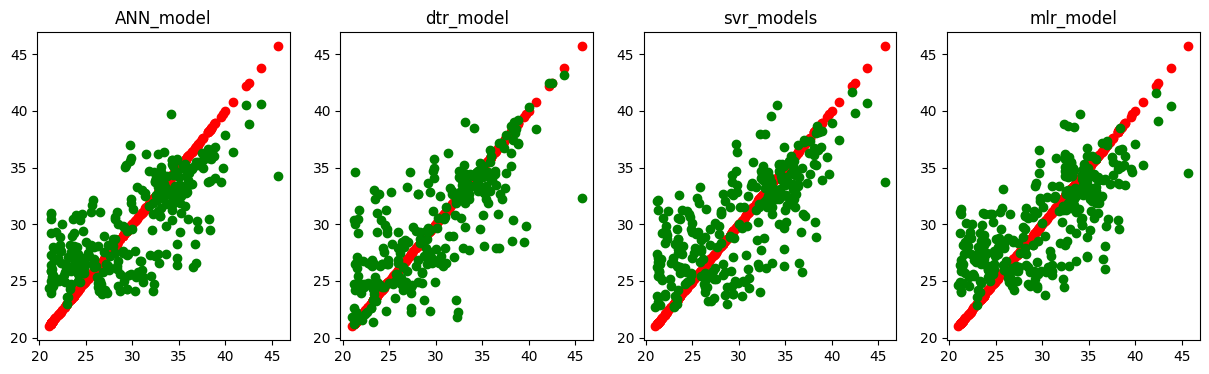

In [48]:
plt.figure(figsize=(15, 4))

plt.subplot(141)
plt.scatter(y_test[:300], y_test[:300], color="red")
plt.scatter(y_test[:300], ann_ypred[:300], color="green")
plt.title("ANN_model")

plt.subplot(142)
plt.scatter(y_test[:300], y_test[:300], color="red")
plt.scatter(y_test[:300], dtr_ypred[:300], color="green")
plt.title("dtr_model")

plt.subplot(143)
plt.scatter(y_test[:300], y_test[:300], color="red")
plt.scatter(y_test[:300], svr_ypred[:300], color="green")
plt.title("svr_models")

plt.subplot(144)
plt.scatter(y_test[:300], y_test[:300], color="red")
plt.scatter(y_test[:300], mlr_ypred[:300], color="green")
plt.title("mlr_model")

<h1>SAVING MODELS</h1>

In [49]:
import joblib

ANN_model.save(filepath="final_model/zeus.keras")  # Neural Network model
joblib.dump(DTR_model, filename="final_model/dtr.bin")  # Decision tree model
# Multiple linear regression model
joblib.dump(MLR_model, filename="final_model/mlrmodel.bin")
# Support vector regression model
joblib.dump(SVR, filename="final_model/SVR.bin")

['final_model/SVR.bin']